### Importação dos dados



In [85]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [86]:
import seaborn as sns

import matplotlib.pyplot as plt

In [87]:
# Adiciona uma nova coluna identificando a loja em cada DataFrame original
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

In [88]:
# Une os quatro DataFrames em um único, ignorando os índices duplicados
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [89]:
# Agrupa os dados por loja e soma os valores da coluna "Preço" para obter o faturamento total
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

# Mostra o faturamento total por loja
print("💰 Faturamento total por loja:")
print(faturamento_total)

💰 Faturamento total por loja:
loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [90]:
# Verifica quantas vendas (linhas) existem por loja no DataFrame unificado
print(lojas['loja'].value_counts())

# Exibe as 5 primeiras linhas da tabela para verificar se os dados foram unidos corretamente
lojas.head()

loja
Loja 1    2359
Loja 2    2359
Loja 3    2359
Loja 4    2358
Name: count, dtype: int64


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [91]:
# Agrupa os dados por loja e soma os valores da coluna "Preço" para calcular o faturamento total
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

# Converte o resultado em DataFrame e renomeia as colunas para facilitar a visualização
faturamento_df = faturamento_total.reset_index()
faturamento_df.columns = ["Loja", "Faturamento Total"]

# Exibe o faturamento total por loja em formato tabular
print("💰 Faturamento total por loja:")
print(faturamento_df)

💰 Faturamento total por loja:
     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


# 2. Vendas por Categoria


In [92]:
# Conta vendas por categoria em cada loja
vendas_categoria_loja = lojas.groupby(["loja", "Categoria do Produto"]).size().reset_index(name="Quantidade de Vendas")

In [93]:
# Ordena os resultados para facilitar a visualização dos dados por loja e categoria
vendas_categoria_loja_ordenado = vendas_categoria_loja.sort_values(by=["loja", "Quantidade de Vendas"], ascending=[True, False])

# Mostra o resultado final
print("📦 Vendas por categoria em cada loja:")
print(vendas_categoria_loja_ordenado)

📦 Vendas por categoria em cada loja:
      loja   Categoria do Produto  Quantidade de Vendas
6   Loja 1                 moveis                   465
2   Loja 1            eletronicos                   448
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
7   Loja 1  utilidades domesticas                   171
14  Loja 2                 moveis                   442
10  Loja 2            eletronicos                   422
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
15  Loja 2  utilidades domesticas                   181
22  Loja 3 

# 3. Média de Avaliação das Lojas

In [94]:
# Calcula a média das avaliações por loja e ordena do maior para o menor
avaliacao_media_loja = lojas.groupby("loja")["Avaliação da compra"].mean().sort_values(ascending=False)

In [95]:
# Converte a Series em DataFrame e redefine o índice
avaliacao_media_loja_df = avaliacao_media_loja.reset_index()

# Renomeia as colunas do DataFrame para nomes mais amigáveis: "Loja" e "Avaliações"
avaliacao_media_loja_df.columns = ["Loja", "Avaliações"]

# Arredonda os valores da coluna "Avaliações" para 2 casas decimais
avaliacao_media_loja_df["Avaliações"] = avaliacao_media_loja_df["Avaliações"].round(2)

# Exibe uma mensagem indicando que será mostrado o resultado da média de avaliação por loja
print("📊 Média de avaliação por loja:")

# Imprime o DataFrame contendo as lojas e suas respectivas médias de avaliação arredondadas
print(avaliacao_media_loja_df)

📊 Média de avaliação por loja:
     Loja  Avaliações
0  Loja 3        4.05
1  Loja 2        4.04
2  Loja 4        4.00
3  Loja 1        3.98


# 4. Produtos Mais e Menos Vendidos

In [96]:
# Conta a quantidade de vendas por produto em cada loja e cria um DataFrame com essa informação
vendas_produto_loja = lojas.groupby(["loja", "Produto"]).size().reset_index(name="Quantidade de Vendas")

In [97]:
# Ordena por loja (A-Z) e quantidade de vendas (maior para menor)
mais_vendidos_por_loja = vendas_produto_loja.sort_values(["loja", "Quantidade de Vendas"], ascending=[True, False])

# Para cada loja única presente na coluna "loja" do DataFrame 'lojas'
for loja_nome in lojas["loja"].unique():
    # Imprime o título indicando que será mostrado o top 5 produtos mais vendidos daquela loja
    print(f"\n📈 Top 5 produtos mais vendidos da {loja_nome}:")

    # Filtra o DataFrame 'mais_vendidos_por_loja' para a loja atual e seleciona os 5 primeiros produtos
    top5 = mais_vendidos_por_loja[mais_vendidos_por_loja["loja"] == loja_nome].head(5)

    # Imprime o DataFrame com os 5 produtos mais vendidos da loja atual
    print(top5)


📈 Top 5 produtos mais vendidos da Loja 1:
      loja             Produto  Quantidade de Vendas
24  Loja 1       Guarda roupas                    60
37  Loja 1         Micro-ondas                    60
47  Loja 1       TV Led UHD 4K                    60
43  Loja 1  Secadora de roupas                    58
3   Loja 1    Blocos de montar                    56

📈 Top 5 produtos mais vendidos da Loja 2:
       loja                   Produto  Quantidade de Vendas
79   Loja 2  Iniciando em programação                    65
88   Loja 2               Micro-ondas                    62
52   Loja 2                   Bateria                    61
91   Loja 2                  Pandeiro                    58
100  Loja 2                    Violão                    58

📈 Top 5 produtos mais vendidos da Loja 3:
       loja          Produto  Quantidade de Vendas
134  Loja 3    Kit banquetas                    57
111  Loja 3        Cama king                    56
138  Loja 3   Mesa de jantar            

In [98]:
# Para cada loja única presente na coluna "loja" do DataFrame 'lojas'
for loja_nome in lojas["loja"].unique():
    # Imprime o título indicando que será mostrado os 5 produtos menos vendidos daquela loja
    print(f"\n📉 5 produtos menos vendidos da {loja_nome}:")

    # Pega os 5 produtos menos vendidos da loja atual
    bottom5 = mais_vendidos_por_loja[mais_vendidos_por_loja["loja"] == loja_nome].tail(5)

    # Imprime o DataFrame com os 5 produtos menos vendidos da loja atual
    print(bottom5)


📉 5 produtos menos vendidos da Loja 1:
      loja            Produto  Quantidade de Vendas
38  Loja 1            Mochila                    39
40  Loja 1           Pandeiro                    36
41  Loja 1  Panela de pressão                    35
11  Loja 1       Celular ABXY                    33
26  Loja 1            Headset                    33

📉 5 produtos menos vendidos da Loja 2:
      loja            Produto  Quantidade de Vendas
73  Loja 2     Fone de ouvido                    37
93  Loja 2           Poltrona                    35
78  Loja 2         Impressora                    34
87  Loja 2     Mesa de jantar                    34
82  Loja 2  Jogo de tabuleiro                    32

📉 5 produtos menos vendidos da Loja 3:
       loja           Produto  Quantidade de Vendas
127  Loja 3          Guitarra                    38
131  Loja 3     Jogo de copos                    36
139  Loja 3       Micro-ondas                    36
140  Loja 3           Mochila                   

# 5. Frete Médio por Loja


In [99]:
# Cálculo do frete médio por loja
frete_medio_loja = lojas.groupby("loja")["Frete"].mean().sort_values(ascending=False)

# Organizar em tabela
frete_medio_df = frete_medio_loja.reset_index()
frete_medio_df.columns = ["Loja", "Frete Médio"]

# Arredonda o frete médio para 2 casas decimais
frete_medio_df["Frete Médio"] = frete_medio_df["Frete Médio"].round(2)

# Mostrar resultado
print("🚚 Frete médio por loja:")
print(frete_medio_df)

🚚 Frete médio por loja:
     Loja  Frete Médio
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


📊 1. Gráfico de barras – Faturamento total por loja

In [100]:
# Faturamento total por loja
faturamento_total = lojas.groupby("loja")["Preço"].sum().sort_values(ascending=False)

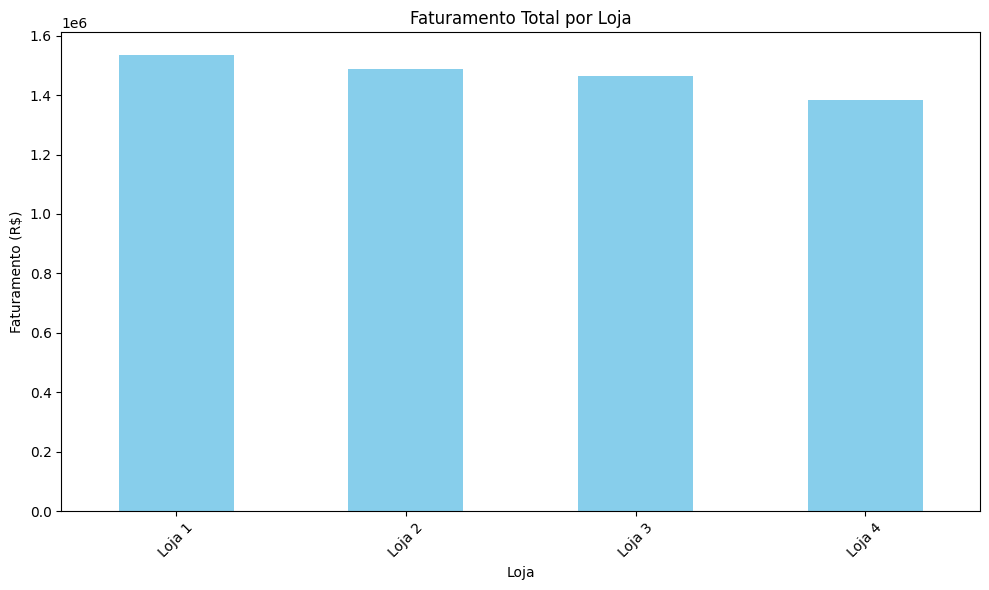

In [101]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
faturamento_total.plot(kind="bar", color="skyblue")
plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 2. Gráfico de linha – Frete médio por loja

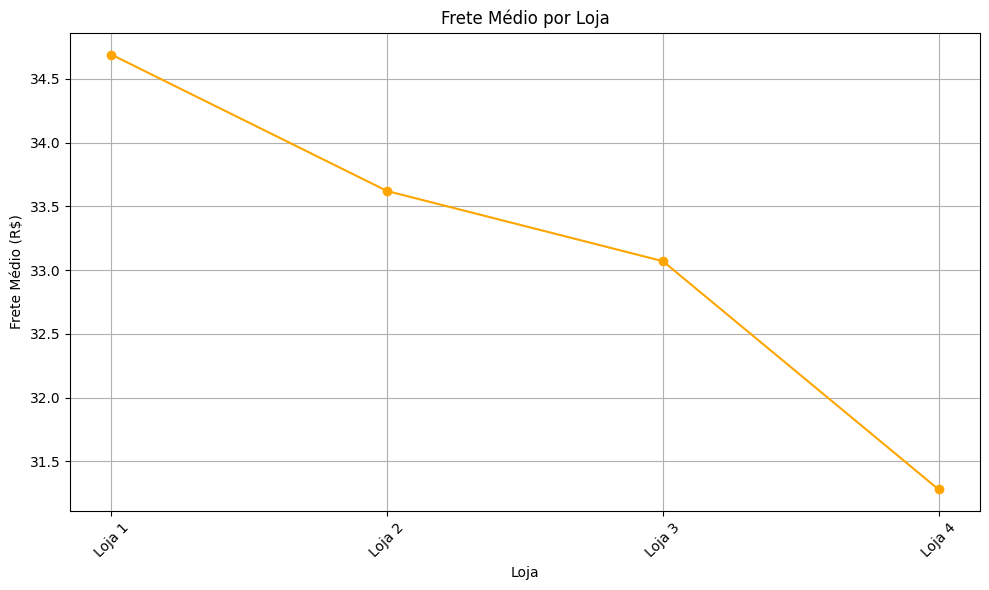

In [102]:
# Usando o DataFrame já criado com frete médio
plt.figure(figsize=(10, 6))
plt.plot(frete_medio_df["Loja"], frete_medio_df["Frete Médio"], marker='o', linestyle='-', color="orange")
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

📉 3. Gráfico de dispersão – Avaliação média x Frete médio por loja


🔍 Dados combinados de Avaliação Média e Frete Médio por loja:
     Loja  Avaliações  Frete Médio
0  Loja 3        4.05        33.07
1  Loja 2        4.04        33.62
2  Loja 4        4.00        31.28
3  Loja 1        3.98        34.69


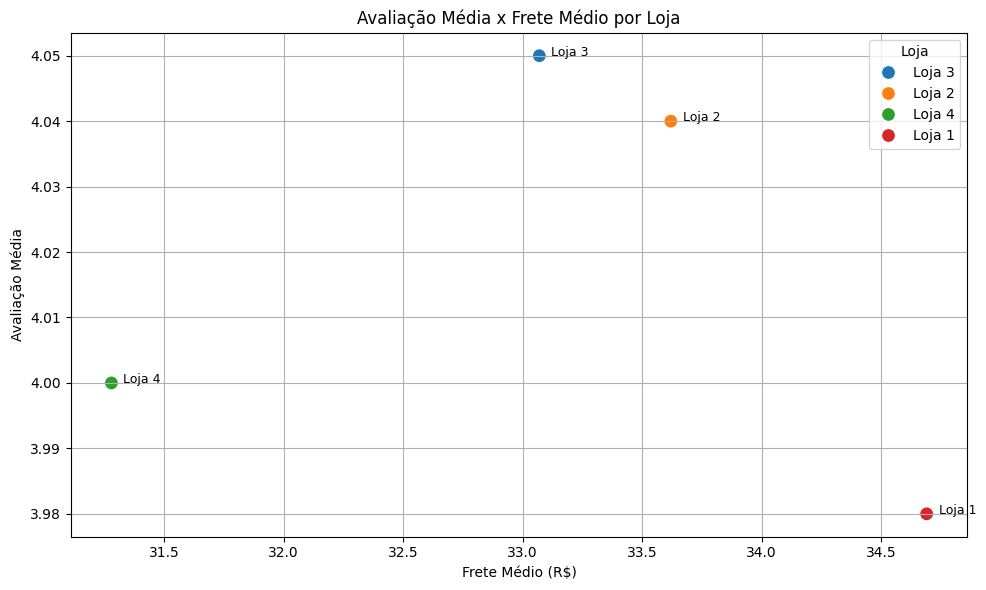

In [116]:
# Une os DataFrames de avaliação média e frete médio usando a coluna "Loja"
avaliacao_frete_df = pd.merge(avaliacao_media_loja_df, frete_medio_df, on="Loja")

# Exibe o DataFrame combinado para conferência
print("\n🔍 Dados combinados de Avaliação Média e Frete Médio por loja:")
print(avaliacao_frete_df)

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avaliacao_frete_df, x="Frete Médio", y="Avaliações", hue="Loja", s=100)

# Adiciona rótulos de cada ponto para identificar as lojas
for i in range(avaliacao_frete_df.shape[0]):
    plt.text(
        x=avaliacao_frete_df["Frete Médio"][i] + 0.05,  # leve deslocamento no X
        y=avaliacao_frete_df["Avaliações"][i],
        s=avaliacao_frete_df["Loja"][i],
        fontsize=9
    )

# Títulos e rótulos
plt.title("Avaliação Média x Frete Médio por Loja")
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Avaliação Média")
plt.grid(True)
plt.tight_layout()
plt.show()
